In [1]:
import numpy as np
import scipy.optimize as sco
import matplotlib.pyplot as plt

## PART III

Data generation

In [2]:
# TRAIN

train_samples_per_class = 30

# Set the variance for each class
variance = 0.3

n1a = np.random.normal(loc=[0, 0], scale=np.sqrt(variance), size=(train_samples_per_class, 2))
n1b = np.random.normal(loc=[0, 1], scale=np.sqrt(variance), size=(train_samples_per_class, 2))
n2a = np.random.normal(loc=[1, 1], scale=np.sqrt(variance), size=(train_samples_per_class, 2))
n2b = np.random.normal(loc=[1, 0], scale=np.sqrt(variance), size=(train_samples_per_class, 2))

labels = np.array([1]*train_samples_per_class*2 + [-1]*train_samples_per_class*2)


X_train = np.vstack([n1a, n1b, n2a, n2b])
Y_train = labels

shuffle_idx = np.random.permutation(X_train.shape[0])
X_train = X_train[shuffle_idx]
Y_train = Y_train[shuffle_idx]


# TEST


test_samples_per_class = 200

n1a = np.random.normal(loc=[0, 0], scale=np.sqrt(variance), size=(test_samples_per_class, 2))
n1b = np.random.normal(loc=[0, 1], scale=np.sqrt(variance), size=(test_samples_per_class, 2))
n2a = np.random.normal(loc=[1, 1], scale=np.sqrt(variance), size=(test_samples_per_class, 2))
n2b = np.random.normal(loc=[1, 0], scale=np.sqrt(variance), size=(test_samples_per_class, 2))

labels = np.array([1]*test_samples_per_class*2 + [-1]*test_samples_per_class*2)


X_test = np.vstack([n1a, n1b, n2a, n2b])
Y_test = labels

shuffle_idx = np.random.permutation(X_test.shape[0])
X_test = X_test[shuffle_idx]
Y_test = Y_test[shuffle_idx]

In [3]:
def soft_margin_SVM_fit(X, Y, C=1.0):
    #zeta >= 1 - y_i(w^T x_i + b)
    #MINIMIZE: 0.5*||w||^2 + C*sum(zeta_i)
    
    d = X.shape[1] # d dimensions
    
    
    kernel = lambda params: np.linalg.norm(params[:-1])**2 + C * np.sum(np.maximum(0, 1 - Y * (np.matmul(X, params[:-1]) - params[-1])))
    
    return sco.minimize(kernel, np.zeros(d+1))
    

In [4]:
params = soft_margin_SVM_fit(X_train, Y_train, C = 10)
params = params.x

In [5]:
params

array([-2.20786144,  0.12074183, -1.01744778])

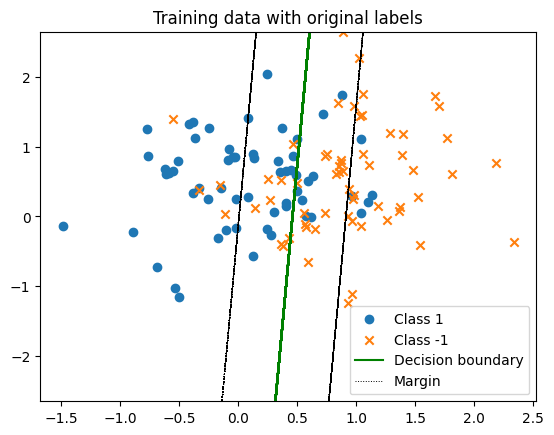

In [6]:
# plt.plot(X_train[:, 0], X_train[:, 1], 'o')
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], label='Class 1', marker='o')
plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], label='Class -1', marker='x')
plt.plot(X_train[:, 0], -params[0]*X_train[:, 0]/params[1] + params[-1]/params[1], label='Decision boundary', color='green')
plt.plot(X_train[:, 0], -params[0]*X_train[:, 0]/params[1] + params[-1]/params[1] + 1/params[1], color='black', ls=':', lw=0.7)
plt.plot(X_train[:, 0], -params[0]*X_train[:, 0]/params[1] + params[-1]/params[1] - 1/params[1], color='black', ls=':', lw=0.7, label='Margin')
plt.ylim(-max(abs(X_train[:, 1])), max(abs(X_train[:, 1])))
plt.legend()
plt.title('Training data with original labels')
plt.show()


In [7]:
Y_pred = np.sign(np.dot(X_test, params[:-1]) - params[-1])

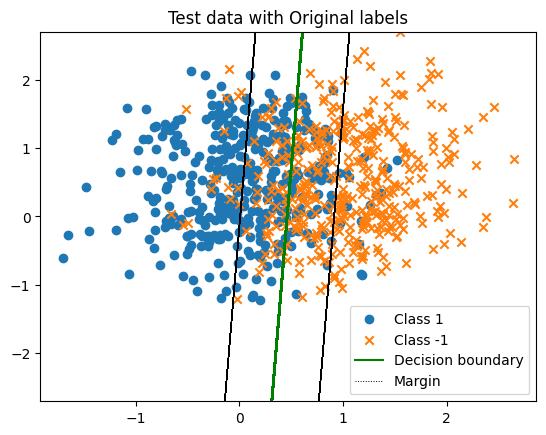

In [8]:
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], label='Class 1', marker='o')
plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], label='Class -1', marker='x')
plt.plot(X_test[:, 0], -params[0]*X_test[:, 0]/params[1] + params[-1]/params[1], label='Decision boundary', color='green')
plt.plot(X_test[:, 0], -params[0]*X_test[:, 0]/params[1] + params[-1]/params[1] + 1/params[1], color='black', ls=':', lw=0.7)
plt.plot(X_test[:, 0], -params[0]*X_test[:, 0]/params[1] + params[-1]/params[1] - 1/params[1], color='black', ls=':', lw=0.7, label='Margin')
plt.ylim(-max(abs(X_test[:, 1])), max(abs(X_test[:, 1])))
plt.title('Test data with Original labels')
plt.legend()
plt.show()


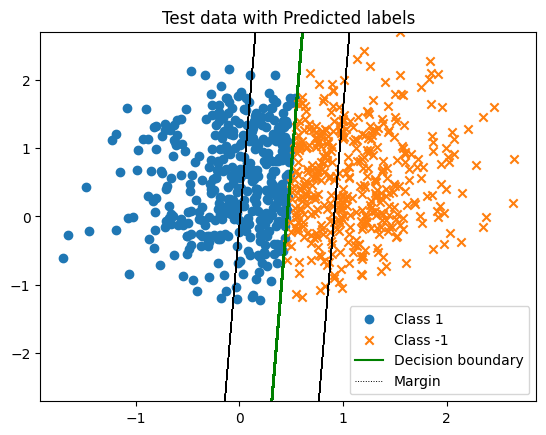

In [9]:
plt.scatter(X_test[Y_pred == 1][:, 0], X_test[Y_pred == 1][:, 1], label='Class 1', marker='o')
plt.scatter(X_test[Y_pred == -1][:, 0], X_test[Y_pred == -1][:, 1], label='Class -1', marker='x')
plt.plot(X_test[:, 0], -params[0]*X_test[:, 0]/params[1] + params[-1]/params[1], label='Decision boundary', color='green')
plt.plot(X_test[:, 0], -params[0]*X_test[:, 0]/params[1] + params[-1]/params[1] + 1/params[1], color='black', ls=':', lw=0.7)
plt.plot(X_test[:, 0], -params[0]*X_test[:, 0]/params[1] + params[-1]/params[1] - 1/params[1], color='black', ls=':', lw=0.7, label='Margin')
plt.ylim(-max(abs(X_test[:, 1])), max(abs(X_test[:, 1])))
plt.title('Test data with Predicted labels')
plt.legend()
plt.show()


In [10]:
accuracy = np.count_nonzero(Y_pred == Y_test) / Y_test.shape[0]

print('Accuracy: ', accuracy*100)

Accuracy:  82.375


In [11]:
hold_out_rho = 0.3
C = 5
n_rep = 10
def outCVSVM(X, Y, C, n_rep, hold_out_rho):
    n = len(X)
    n_hold_out = int(n*hold_out_rho)
    hold_out_accuracy = np.zeros(n_rep)
    train_accuracy = np.zeros(n_rep)
    for i in range(n_rep):
        shuffle_idx = np.random.permutation(n)
        X_train = X[shuffle_idx]
        Y_train = Y[shuffle_idx]
        X_hold_out = X_train[:n_hold_out]
        Y_hold_out = Y_train[:n_hold_out]
        X_train = X_train[n_hold_out:]
        Y_train = Y_train[n_hold_out:]
        # Y_pred_hold_out = soft_margin_SVM_fit(X_train, Y_train, X_hold_out, k)
        params = soft_margin_SVM_fit(X_train, Y_train, C).x
        Y_pred_hold_out = np.sign(np.dot(X_hold_out, params[:-1]) - params[-1])
        hold_out_accuracy[i] = np.count_nonzero(Y_hold_out == Y_pred_hold_out)/len(Y_hold_out)
        # Y_pred_train = soft_margin_SVM_fit(X_train, Y_train, X_train, k)
        Y_pred_train = np.sign(np.dot(X_train, params[:-1]) - params[-1])
        train_accuracy[i] = np.count_nonzero(Y_train == Y_pred_train)/len(Y_train)
        
        
    return np.round([np.mean(hold_out_accuracy)*100, np.mean(train_accuracy)*100], 2)

In [12]:
aaa = []
for C in range(1, 25):
    svmout = outCVSVM(X_train, Y_train, C, n_rep, hold_out_rho)
    print("C = ", C, ": ", svmout)
    aaa.append(svmout)

C =  1 :  [77.78 77.86]
C =  2 :  [78.33 77.5 ]
C =  3 :  [73.89 79.76]
C =  4 :  [76.94 77.86]
C =  5 :  [78.61 77.86]
C =  6 :  [77.22 78.45]
C =  7 :  [78.33 79.29]
C =  8 :  [74.72 80.48]
C =  9 :  [77.22 79.52]
C =  10 :  [79.17 78.81]
C =  11 :  [74.17 80.95]
C =  12 :  [78.89 77.86]
C =  13 :  [80.28 77.86]
C =  14 :  [73.33 81.19]
C =  15 :  [79.72 77.98]
C =  16 :  [77.5  79.88]
C =  17 :  [76.94 79.88]
C =  18 :  [77.78 80.  ]
C =  19 :  [77.5  78.21]
C =  20 :  [77.78 79.64]
C =  21 :  [81.39 77.5 ]
C =  22 :  [78.06 79.29]
C =  23 :  [73.89 80.  ]
C =  24 :  [75.   80.83]


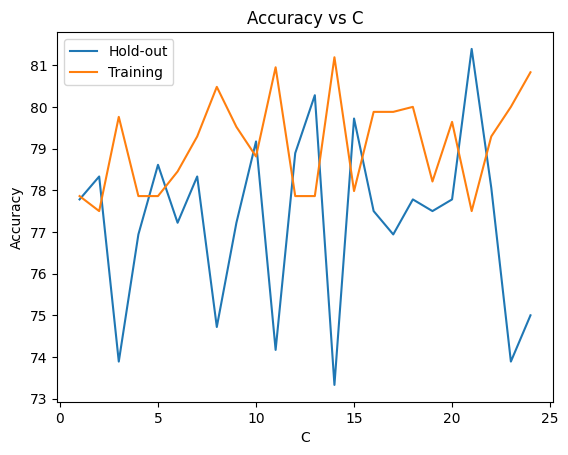

In [13]:
plt.plot(range(1, 25), [x[0] for x in aaa], label="Hold-out")
plt.plot(range(1, 25), [x[1] for x in aaa], label="Training")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Accuracy vs C")
plt.legend()
plt.show()

In [14]:
C_best = np.argmax([x[0] for x in aaa])
print('C =', C_best, 'is the best C for hold-out')

C = 20 is the best C for hold-out


(b) How is the value of C affected by ρ (percentage of points held out) and number of
repetitions? What does a large number of repetitions provide?

In [15]:
# Rho vs C
best_C = []
for rho in [0.1, 0.3, 0.5, 0.7, 0.9]:
    # print("rho = ", rho, ": ", outCVSVM(X_train, Y_train, 5, 10, rho))
    aaa = []
    for C in range(1, 25):
        svmout = outCVSVM(X_train, Y_train, C, n_rep, hold_out_rho)
        aaa.append(svmout)
    best_C.append(np.argmax([x[0] for x in aaa]))
    print('Rho = ' + str(rho) + ': C =', np.argmax([x[0] for x in aaa]), 'is the best C for hold-out')


Rho = 0.1: C = 4 is the best C for hold-out
Rho = 0.3: C = 6 is the best C for hold-out
Rho = 0.5: C = 6 is the best C for hold-out
Rho = 0.7: C = 4 is the best C for hold-out
Rho = 0.9: C = 5 is the best C for hold-out


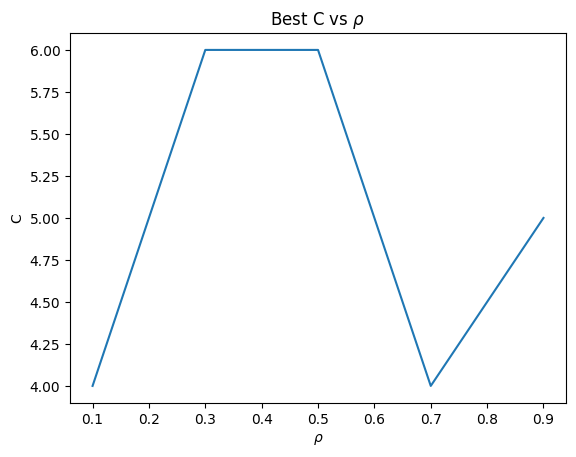

In [16]:
plt.plot([0.1, 0.3, 0.5, 0.7, 0.9], best_C)
plt.xlabel("$\\rho$")
plt.ylabel("C")
plt.title("Best C vs $\\rho$")
plt.show()

In [17]:
for n_rep in [1, 5, 10, 20, 30]:
    print("n_rep = ", n_rep, ": ", outCVSVM(X_train, Y_train, 5, n_rep, 0.3))

n_rep =  1 :  [77.78 79.76]


n_rep =  5 :  [79.44 77.14]
n_rep =  10 :  [76.39 79.64]
n_rep =  20 :  [78.89 77.62]
n_rep =  30 :  [77.13 79.96]


In [18]:
best_C_nrep = []
for n_rep in [1, 5, 10, 20, 30]:
    # print("rho = ", rho, ": ", outCVSVM(X_train, Y_train, 5, 10, rho))
    aaa = []
    for C in range(1, 25):
        svmout = outCVSVM(X_train, Y_train, C, n_rep, 0.3)
        aaa.append(svmout)
    best_C_nrep.append(np.argmax([x[0] for x in aaa]))
    # print('N_rep = ' + str(rho) + ': k = ', np.argmax([x[0] for x in aaa])*2+1, 'is the best k for hold-out')
    print('For = ' + str(n_rep) + ' repetitions: C =', np.argmax([x[0] for x in aaa]), 'is the best')


For = 1 repetitions: C = 23 is the best
For = 5 repetitions: C = 23 is the best
For = 10 repetitions: C = 2 is the best
For = 20 repetitions: C = 23 is the best
For = 30 repetitions: C = 22 is the best


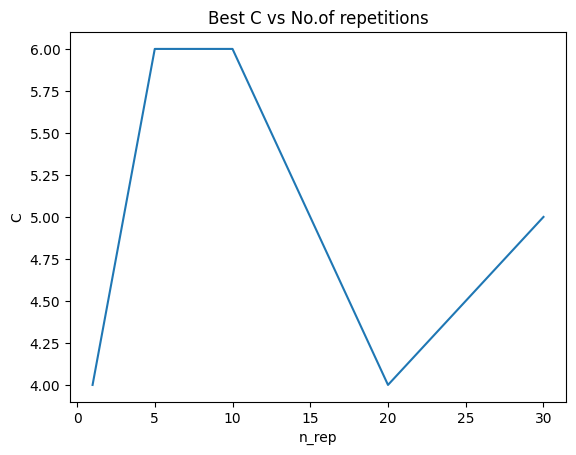

In [19]:
#k vs n_rep
plt.plot([1, 5, 10, 20, 30], best_C)
plt.xlabel('n_rep')
plt.ylabel('C')
plt.title('Best C vs No.of repetitions')
plt.show()

(c) Make a comparison of the performance of the soft-margin SVM with best value of
C and kNN with best k (for the current modified dataset), that is, which one
performs better.

In [20]:
def kNNClassify(X_train, Y_train, X_test, n_neighbors):

    distances = np.sqrt(np.sum((X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :])**2, axis=2))   
    
    kNN_loc = np.argsort(distances, axis=1)[:, :n_neighbors]
    
    k_NN_labels = Y_train[kNN_loc]
    
    Y_pred = np.array([np.argmax(np.bincount(x+1)) for x in k_NN_labels]) # +1 as bincount needs non-negative integers
    
    
    return Y_pred-1

In [21]:
hold_out_rho = 0.3
n_rep = 10
def outCVkNN(X, Y, k, n_rep, hold_out_rho):
    n = len(X)
    n_hold_out = int(n*hold_out_rho)
    hold_out_accuracy = np.zeros(n_rep)
    train_accuracy = np.zeros(n_rep)
    for i in range(n_rep):
        shuffle_idx = np.random.permutation(n)
        X_train = X[shuffle_idx]
        Y_train = Y[shuffle_idx]
        X_hold_out = X_train[:n_hold_out]
        Y_hold_out = Y_train[:n_hold_out]
        X_train = X_train[n_hold_out:]
        Y_train = Y_train[n_hold_out:]
        Y_pred_hold_out = kNNClassify(X_train, Y_train, X_hold_out, k)
        hold_out_accuracy[i] = np.count_nonzero(Y_hold_out == Y_pred_hold_out)/len(Y_hold_out)
        Y_pred_train = kNNClassify(X_train, Y_train, X_train, k)
        train_accuracy[i] = np.count_nonzero(Y_train == Y_pred_train)/len(Y_train)
        
        
    return np.round([np.mean(hold_out_accuracy)*100, np.mean(train_accuracy)*100], 2)

In [22]:
aaa = []
for k in range(1, 25, 2):
    knnout = outCVkNN(X_train, Y_train, k, n_rep, hold_out_rho)
    print("k = ", k, ": ", knnout)
    aaa.append(knnout)

k =  1 :  [ 72.78 100.  ]
k =  3 :  [72.5 86.9]
k =  5 :  [76.11 82.74]
k =  7 :  [82.22 81.31]
k =  9 :  [76.94 81.67]
k =  11 :  [77.5  80.71]
k =  13 :  [77.5  81.31]
k =  15 :  [74.72 82.14]
k =  17 :  [76.11 79.52]
k =  19 :  [72.22 80.71]
k =  21 :  [73.33 78.69]
k =  23 :  [70.56 78.45]


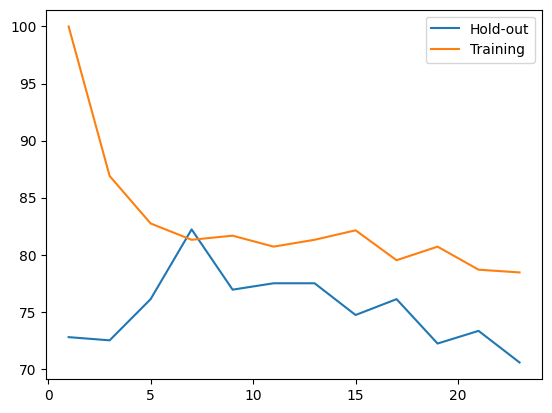

In [23]:
plt.plot(range(1, 25, 2), [x[0] for x in aaa], label="Hold-out")
plt.plot(range(1, 25, 2), [x[1] for x in aaa], label="Training")
plt.legend()
plt.show()

In [24]:
k_best = np.argmax([x[0] for x in aaa])*2+1 
print('k =', k_best, 'is the best k for hold-out')

k = 7 is the best k for hold-out


In [25]:
Y_pred_kNN = kNNClassify(X_train, Y_train, X_test, k_best)
kNN_accuracy = np.count_nonzero(Y_pred_kNN == Y_test)*100 / Y_test.shape[0]

In [26]:
params = soft_margin_SVM_fit(X_train, Y_train, C = C_best)
params = params.x
Y_pred_SVM = np.sign(np.dot(X_test, params[:-1]) - params[-1])
SVM_accuracy = np.count_nonzero(Y_pred_SVM == Y_test)*100 / Y_test.shape[0]

In [27]:
print('kNN accuracy: ', kNN_accuracy)
print('SVM accuracy: ', SVM_accuracy)

if kNN_accuracy > SVM_accuracy:
    print('kNN is better')

else:
    print('SVM is better')

kNN accuracy:  79.875
SVM accuracy:  82.375
SVM is better
